# Earthquake Viewer

This notebook reads in historical earthquake data from the Los Angeles region and prompts the user to enter a location and radius to define a region in which to view earthquakes

#### Imports

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

#### Read in USGS data

In [6]:
#load earthquake data from 1950-2020
locmag = pd.read_csv('./datasets/eq_data.csv')
datlen = locmag.shape[0]

# convert time to pandas datetime
locmag['time'] pd.to_datetime(locmag['time'])

#### Read in kml file with LA coastline and extract coordinates

In [12]:
#load LA coastline kml file
gedat = pd.read_csv('./datasets/LAcoast.csv')
laclat = gedat[gedat['label'] > 10]
laclon = gedat[gedat['label'] < -10]

#### Read in city data

In [25]:
# plot major cities in the region
cities = pandas.read_csv('./datasets/cities.csv')

#### Plot all earthquake data as a map

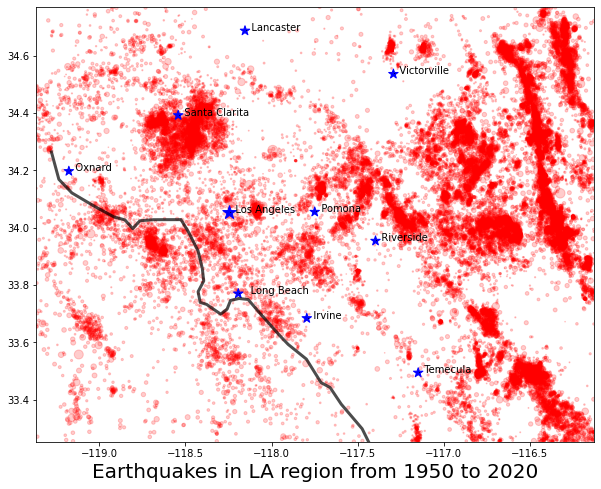

In [24]:
# scale and plot earthquake markers
a=np.multiply(locmag.mag,locmag.mag)
s=np.multiply(locmag.mag,a)
fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(locmag.longitude,locmag.latitude,c='r',s=s/2,alpha=0.2)
ax.plot(laclon,laclat,'k-',linewidth=3,alpha=0.7)

# plot city locations and names
ax.scatter(cities['lon'],cities['lat'],s=cities['marker']*10,marker='*',c='b')
for i in range(cities.shape[0]):
    ax.text(cities['lon'][i],cities['lat'][i],cities['city'][i])

plt.xlim(-119.366,-116.125)
plt.ylim(33.253,34.77)
plt.xlabel('Earthquakes in LA region from 1950 to 2020',fontsize=20)
# plt.savefig('./plots/la_quakes.png',dpi=235,bbox_inches='tight');

## User Input Section

In [26]:
# prompt user for their location and magnitude cutoff
print('\n')
print('Enter the latitude of your location (eg Pasadena = 34.148): ')
nulat = input()
print('Enter the longitude of your location (eg Pasadena = -118.145): ')
nulon = input()
print('Enter the minimum magnitude you want to see (eg 4): ')
magcut = input()



Observe the map to see LA region earthquakes from 1950-2020


Enter the latitude of your location (eg Pasadena = 34.148): 


 34.148


Enter the longitude of your location (eg Pasadena = -118.145): 


 -118.145


Enter the minimum magnitude you want to see (eg 4): 


 3


#### Filter data to user criteria

In [52]:
# calculate distances from center location in miles
locmag['x_dist'] = (locmag['latitude'] - float(nulat))*(10/0.144)
locmag['y_dist'] = (locmag['longitude'] - float(nulon))*(10/0.175)
locmag['distance'] = np.sqrt(locmag['x_dist']**2 + locmag['y_dist']**2)

# filter to earthquakes within specified radius and larger than the specified magnitude
zone20 = locmag[(locmag['distance'] <= 20) & (locmag['mag'] >= float(magcut))]

# convert city distance to miles relative to user location
cit_y = (cities['lat'] - float(nulat))*(10/0.144)
cit_x = (cities['lon'] - float(nulon))*(10/0.175)

#### Generate plots

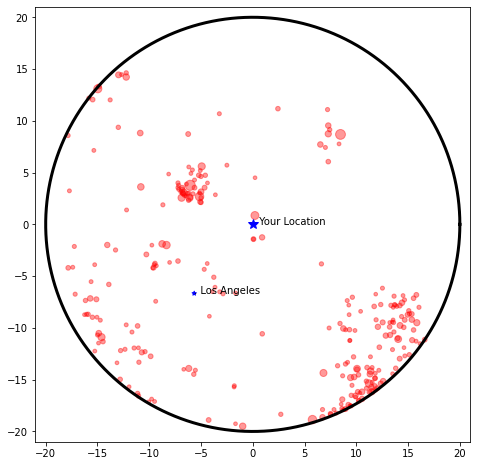

In [77]:
if zone20.shape[0] > 0:
    # scale and plot earthquake markers
    fig1 = plt.figure(figsize=(8,8))
    ax1 = fig1.add_subplot(111)
    ax1.scatter(zone20['x_dist'],zone20['y_dist'],c='r',s=(zone20['mag']**3)/2,alpha=0.4)

    # plot user location
    ax1.plot(0,0,"*",c='b',markersize=10)
    ax1.text(0,0,'  Your Location')

    # draw 20 mile circle around user location
    t = np.linspace(0,2*math.pi,num=200)
    x1 = 20*np.cos(t);
    y1 = 20*np.sin(t)
    ax1.plot(x1,y1,'k-',linewidth=3)
    ax1.set_aspect(aspect=1)
    plt.xlim(-21,21)
    plt.ylim(-21,21)
    
    #add cities to map
    ax1.scatter(cit_x,cit_y,s=cities['marker'],marker='*',c='b')
    for i in range(cities.shape[0]):
        if abs(cit_x[i]) <= 20 and abs(cit_y[i]) <= 20:
            ax1.text(cit_x[i],cit_y[i],cities['city'][i])
    # plt.savefig('./plots/focus_quakes.png',dpi=235,bbox_inches='tight');
else:
    print('\n')
    print('There are no earthquakes that fit these parameters')
    print('Check that the coordinates fall within the map area or decrease magnitude cutoff')

In [72]:
zone20['time'] = pd.to_datetime(zone20['time'])

/Users/Sam/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


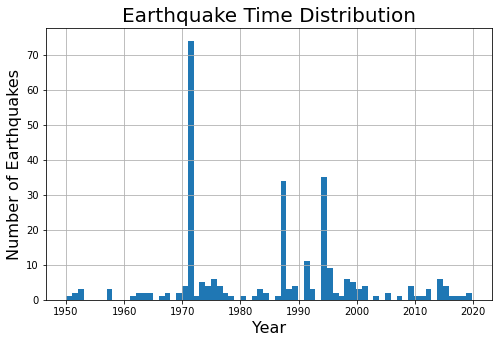

In [87]:
plt.figure(figsize=(8,5))
zone20['time'].hist(bins=70)
plt.xlabel('Year',fontsize=16)
plt.ylabel('Number of Earthquakes',fontsize=16)
plt.title('Earthquake Time Distribution',fontsize=20);
plt.savefig('./plots/time_dist.png',dpi=235,bbox_inches='tight');

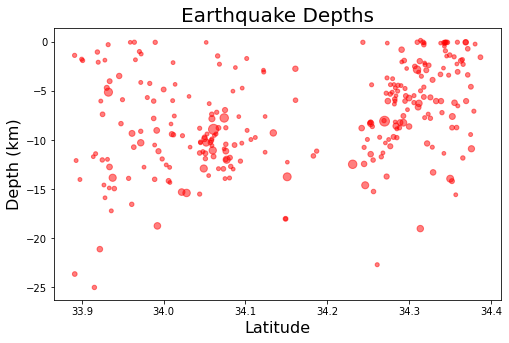

In [88]:
plt.figure(figsize=(8,5))
plt.scatter(zone20['latitude'],zone20['depth']*-1,s=(zone20['mag']**3)/2,alpha=0.5,c='r')
plt.xlabel('Latitude',fontsize=16)
plt.ylabel('Depth (km)',fontsize=16)
plt.title('Earthquake Depths',fontsize=20);
plt.savefig('./plots/eq_depth.png',dpi=235,bbox_inches='tight');